In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
import scipy.stats as stats
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
from IPython.core.pylabtools import figsize
figsize(14.5,6.5)
from sklearn import linear_model



# Linear Bandit Solver

### Bayesian Linear Regression


(array([ 80.34835186,  75.11735322,  34.48627582,  90.75239882,
         24.01115382,   1.07529485,  16.5928421 ,   5.16303816,
         83.45136594,  77.3113199 ]),
 array([ 80.34835186,  75.11735322,  34.48627582,  90.75239882,
         24.01115382,   1.07529485,  16.5928421 ,   5.16303816,
         83.45136594,  77.3113199 ]))

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


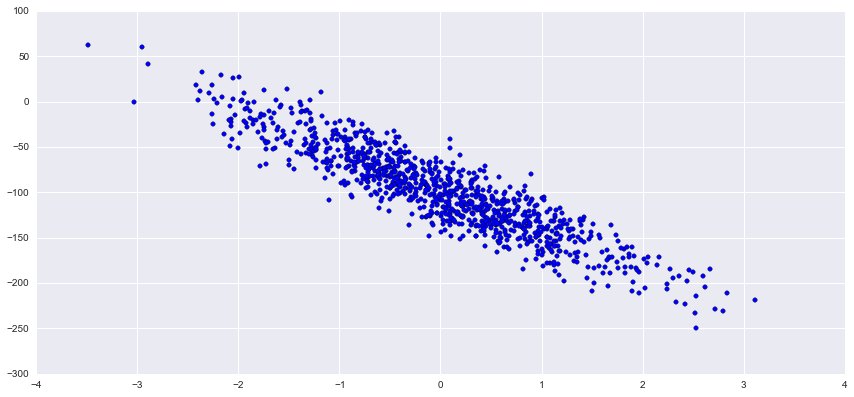

In [171]:
num_features = 1
num_data = 1000

from sklearn.datasets import make_regression 

X1 = np.atleast_2d(np.linspace(0,1,num_data)).T

np.random.shuffle(X1)
def evaluate(X):
    return  X*100  + np.random.normal(0,1)
y1 = []
for i in range(num_data):
    y1 += [evaluate(X1[i,:])]
y1 = np.array(y1).flatten()

X,y,coef = make_regression(num_data,num_features,noise   = 20,shuffle=False,coef =True)
y += 100
plt.scatter(X,-y)
y = -y*2
X = X1
y = y1

#X.shape,X1.shape,y.shape,y1.shape,type(X),type(X1),(X+X1).shape,type(y),type(y1),(y+y1).shape
#X[:10],X1[:10]
y[:10],y1[:10]

In [172]:
class BayesReg(object):
    def __init__(self,num_features,alpha = 1,beta = 1):
        self.num_features = num_features
        self.B = np.eye(self.num_features+1)*alpha
        self.Binv = np.linalg.inv(self.B)
        self.f = np.zeros(num_features+1)
        #self.f = self.f.T
        self.mu = 1
        self.beta = beta
        
    def add_intercept(self,X):
        try:
            X.shape[1]
        except:
            X = np.atleast_2d(X)
        X_new = np.ones((X.shape[0],X.shape[1]+1),dtype=X.dtype)
        X_new[:,1:] = X[:,:]
        return X_new
    
    def add_intercept2(self,X):
        return np.atleast_2d(X).T
        #X = np.atleast_2d(X)
        #X = np.append(np.atleast_2d(np.ones(shape=X.shape[1])).T,X,axis=1)
        #return X
    
    def observe_x(self,x,y):
        x = self.add_intercept(x)
        #print(np.outer(x,x))
        self.B = self.B + np.outer(x,x)
        #print(self.B)
        self.Binv = np.linalg.inv(self.B)
        #self.Binv = 1/self.B 
        #self.f = self.f + np.dot(x,y)
        #print(x*y)
        #print(np.dot(x,y))
        self.f = self.f + (x*y)[0]
        #print('f')
       # print(self.f)
        #print('nof')
        self.mu += np.dot(self.Binv,self.f)
        #print('mu')
        #print(self.mu)
        #print('nomu')
        #self.mu += self.Binv * self.f
    
        
    def train(self,X,y,shuffle = True):
        index = list(range(X.shape[0]))
        if shuffle ==True:
            np.random.shuffle(index)
        for i in index:
            self.observe_x(X[i],y[i])

    def predict(self,X):
        """predicts ML estimate (non bayesian)"""
        pred_list = []
        for i in range(X.shape[0]):
            pred_list += [np.sum(self.mu.dot(self.add_intercept(X[i])))]
            
        return np.array(pred_list)
    
    def sx(self,x):
        x = self.add_intercept(x)
        return np.sqrt(1/self.beta + x.dot(self.Binv).dot(x.T)[0])
    
    def mx(self,x,N=1):
        x = self.add_intercept(x)
        x_Binv = np.atleast_2d(self.Binv.dot(self.mu)).T
        print(x_Binv.shape)
        print(x.shape)
        print()
        return (self.beta*N*x.dot(x_Binv)).flatten()
    
    def predict_dist(self,X):
        sx = []
        mx = []
        for i in range(X.shape[0]):
            sx += [self.sx(X[i])]
            mx += [self.mx(X[i])]
        sx = np.asarray(sx)
        mx = np.asarray(mx)
        return mx,sx
    
    def draw(self,num=1):
        w = []
        self.muc = self.beta*self.Binv.dot(self.mu)

        for i in range(num):
            w += [stats.multivariate_normal.rvs(self.muc.flatten(),self.Binv)]
        return w
        
        
        

In [173]:
test = BayesReg(num_features,alpha = 1,beta = 1)
test.add_intercept(1)

array([[1, 1]])

In [174]:
test.train(X,y)

In [175]:
test.mu

array([  2378.93316567,  95243.99545664])

In [176]:
lin = np.linspace(min(X)*2,max(X)*2,100)#(-3,3,100)#
num_draws = 10

m,s = test.predict_dist(lin)
w = test.draw(num=num_draws)
w[0][0]

lin.shape, m.shape, s.shape

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1, 2)

(2, 1)
(1,

((100,), (100, 1), (100, 1))

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


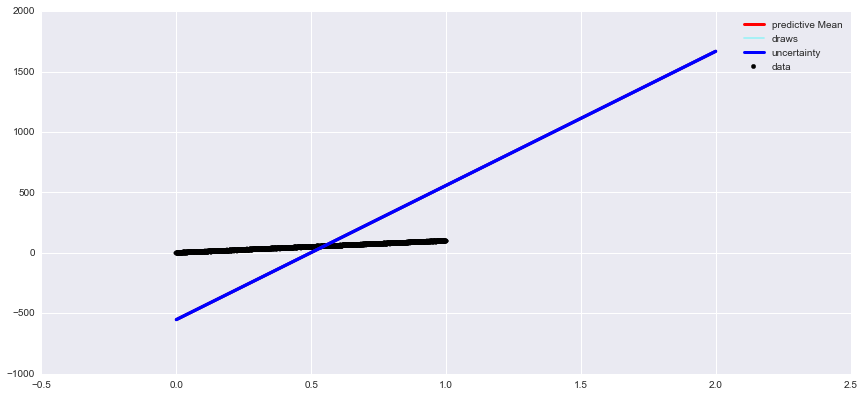

In [177]:
exponent = 10
plt.plot(lin,m,color='red',linewidth = 3,label='predictive Mean')
#plt.plot(X,y,'x')
plt.scatter(X,y,color='black',label='data')
for i in range(num_draws-1):
    plt.plot(lin,lin*w[i+1][1]+w[i+1][0],color='cyan',alpha = (np.log(num_draws)+1)/num_draws)
plt.plot(lin,lin*w[0][1]+w[0][0],color='cyan',alpha = (np.log(num_draws)+1)/num_draws,label = 'draws')

plt.plot(lin,m - s**exponent,'blue',linewidth = 3,label='uncertainty')
plt.plot(lin,m + s**exponent,'blue',linewidth = 3)

plt.legend()
#plt.fill_between(lin,m,m- s**exponent,alpha = .3)
#plt.fill_between(lin,m,m + s**exponent,alpha = .3)



C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


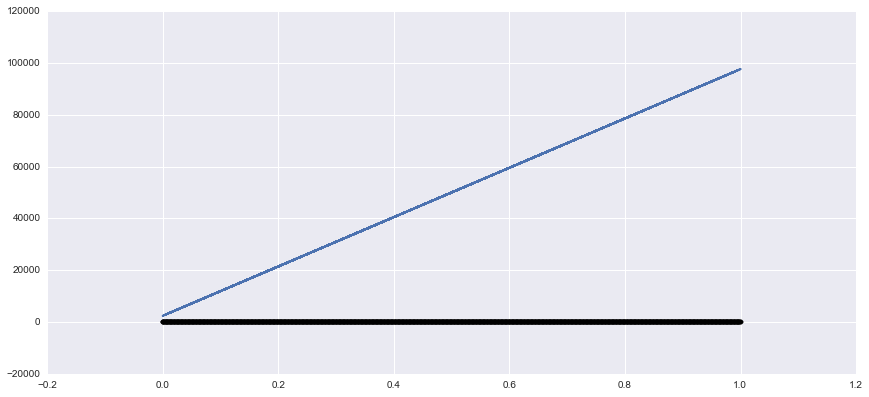

In [178]:
plt.plot(X,test.mu[0]+test.mu[1]*X)
plt.scatter(X,y,color='black',label='data')


In [179]:
regr = linear_model.LinearRegression()

In [180]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


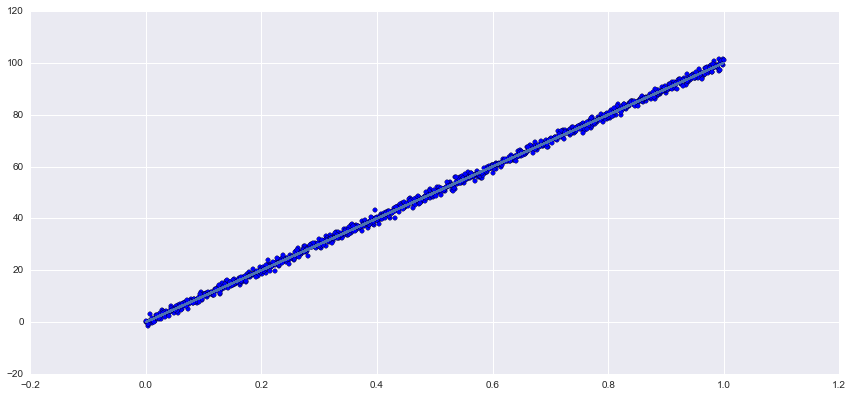

In [181]:
plt.plot(X,regr.predict(X))
plt.scatter(X,y)